In [1]:
# Imports for data analysis
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime
import seaborn as sns
from pprint import pprint


In [ ]:
# read csv
df_ppl_involved = pd.read_csv("../Resources/People_Involved.csv")
df_ppl_involved = df_ppl_involved.sort_values(by = "Case Date")
df_ppl_involved.drop("Unnamed: 0", axis= 1)
df_ppl_involved.head()

C:\Users\david\AppData\Local\Temp\ipykernel_21044\729690324.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ppl_involved = pd.read_csv("../Resources/combined_data.csv")


,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
15,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)
17,130001,54,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13)
4,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157)
5,480010,20,1,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395)
6,480006,25,1,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251)


: 

In [ ]:
#check length of csv
len(df_ppl_involved)

188221

In [ ]:
df_ppl_involved["Case Year"] = df_ppl_involved["Case Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y"))
df_ppl_involved.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
15,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
17,130001,54,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13),2017
4,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157),2017
5,480010,20,1,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395),2017
6,480006,25,1,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251),2017


In [ ]:
print(len(df_ppl_involved.groupby(["Case Year", "St Case Num", "State"])))

133316


<h1>1. Gender Analysis</h1>

In [ ]:
#checking values
df_ppl_involved["Sex"].value_counts()

Sex
1    125605
2     57720
9      3376
8      1520
Name: count, dtype: int64

In [ ]:
# remove the unknown and weird numbers
df_ppl_involved = df_ppl_involved[(df_ppl_involved["Sex"] == 1) | (df_ppl_involved["Sex"] == 2)]

#convert sex names to actual names, male = 1, female = 2
df_ppl_involved.loc[:, "Sex"] = df_ppl_involved["Sex"].replace({1: "Male", 2: "Female"})
df_ppl_involved.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
15,450001,27,Male,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
17,130001,54,Female,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13),2017
5,480010,20,Male,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395),2017
6,480006,25,Male,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251),2017
12,450001,36,Male,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Not Reported,Not Reported,Not Reported,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017


<h3>1a. Fatality Pie Chart by Sex</h3>

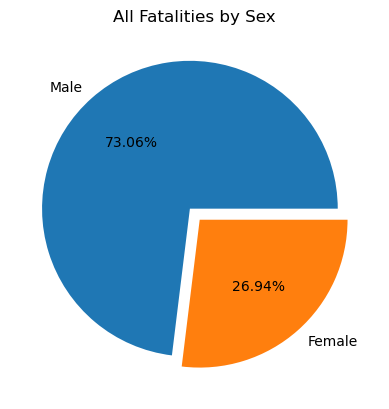

In [ ]:
#Get the number of fatal cases of males and females 
num_fatal_male = len(df_ppl_involved[(df_ppl_involved["Sex"] == "Male") & (df_ppl_involved["Is Fatal"] == True)])
num_fatal_female = len(df_ppl_involved[(df_ppl_involved["Sex"] == "Female") & (df_ppl_involved["Is Fatal"] == True)])

labels = ["Male", "Female"]
values = [num_fatal_male, num_fatal_female]
explode = [0.05, 0.05]

plt.pie(values, labels=labels, autopct="%.2f%%", explode= explode)
plt.title("All Fatalities by Sex")
plt.show()

<h3>1b. Fatality Rate Per Sex Category</h3>

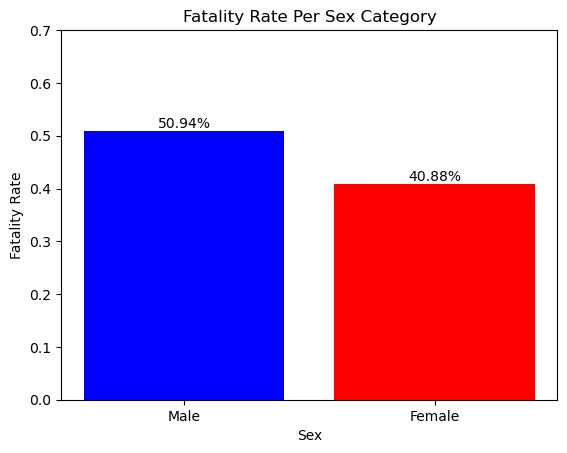

In [ ]:
# Total number of female and male
num_female = len(df_ppl_involved[df_ppl_involved["Sex"]== "Female"])
num_male = len(df_ppl_involved[df_ppl_involved["Sex"] == "Male"])

# Male and female fatality rates
fatality_rate_male = num_fatal_male/num_male
fatality_rate_female = num_fatal_female/num_female

# labels for bar graph
x_labels = ["Male", "Female"]
fatality_rates = [fatality_rate_male, fatality_rate_female]

#plot the graphs
plt.bar(x_labels, fatality_rates, color = ["Blue", "Red"])
plt.title("Fatality Rate Per Sex Category")
plt.ylabel("Fatality Rate")
plt.xlabel("Sex")
plt.ylim(0, .7)
# add percent labels
for idx, data in enumerate(fatality_rates):
    plt.text(idx, data, f'{data*100:.2f}%', ha = "center", va = "bottom")

plt.show()


In [ ]:
#Check Race Values
print(df_ppl_involved["Race"].value_counts())
df_ppl_involved["Race"].isna().sum()

Race
Not a Fatality (not Applicable)                                                                   23499
White                                                                                             15702
Black                                                                                              3105
Unknown                                                                                             764
American Indian (includes Alaska Native)                                                            336
All other races                                                                                     278
Other Asian or Pacific Islander                                                                      83
Asian Indian                                                                                         75
Filipino                                                                                             57
Multiple Races (individual races not specified; ex. "mixed"

139137

A lot of the races are NaN. Not useful data.

<h1>2. SEAT POSITION ANALYSIS </h1>


In [ ]:
#checking values 
df_ppl_involved["Seat Pos"].value_counts()

#only keeps the ones that have a lot of data
df_seat_pos = df_ppl_involved[(df_ppl_involved["Seat Pos"] == "Front Seat, Left Side")|
                        (df_ppl_involved["Seat Pos"] == "Front Seat, Right Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Left Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Right Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Middle")
                       ][["Seat Pos","Is Fatal"]].copy()
df_seat_pos.head()

,Seat Pos,Is Fatal
15,"Second Seat, Right Side",False
17,"Front Seat, Left Side",True
5,"Front Seat, Left Side",True
6,"Front Seat, Left Side",True
12,"Front Seat, Left Side",False


<h3> 2a. Fatality vs. Seat Position </h3>

<h4>Stacked Bar Graph Fatal/Non-fatal and Seat Position</h4>

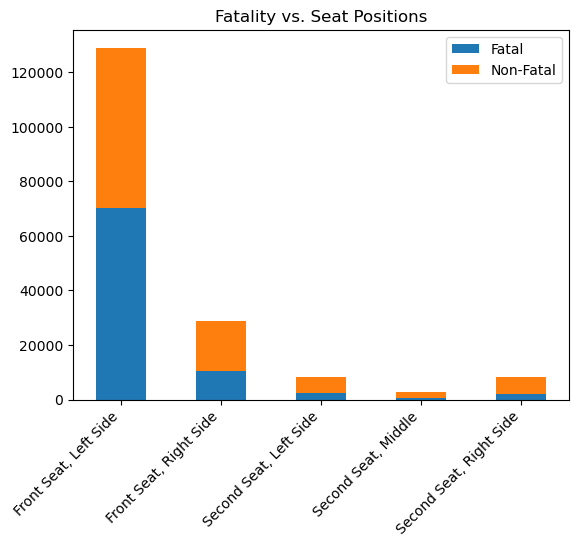

In [ ]:
#x labels for bar plot
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in x_labels]
}

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, counts in y_data.items():
    ax.bar(x_labels, counts, width, label = boolean, bottom = bottom)
    bottom += counts

plt.xticks(rotation = 45, ha='right')
plt.title("Fatality vs. Seat Positions")
plt.legend(loc = "upper right")
plt.show()


<h4>Pie Chart Comparing Proportions of Fatality For Each Seat Position</h4>

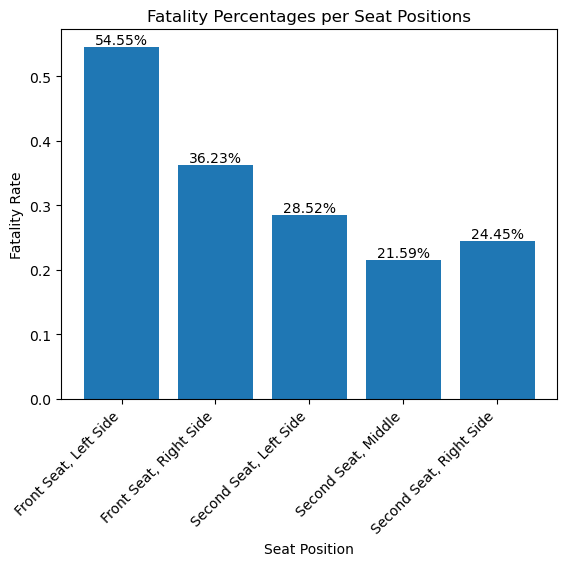

In [ ]:
#xlabels for pie chart
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal for each seat position and the total
fatals = [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels]
totals = [len(df_seat_pos[df_seat_pos["Seat Pos"] == pos]) for pos in x_labels]

#get the fatality proportions for each seat positions
fatal_proportions = [fatal/total for fatal, total in zip(fatals, totals)]

#plot the chart
plt.bar(x_labels, fatal_proportions)
plt.title("Fatality Percentages per Seat Positions")
plt.xticks(x_labels, rotation = 45, ha = "right")
plt.xlabel("Seat Position")
plt.ylabel("Fatality Rate")

# Add labels on bars
for i, value in enumerate(fatal_proportions):
    plt.text(i, value, f'{value*100:.2f}%', ha='center',va='bottom')

plt.show()



<h3>2b. Chisquare Test of Homogeneity for Proportions</h3>

In [ ]:
# Here, we want to see if the proportion of survival/fatality rates are the same.
# Null hypothesis: The Fatality rate is the same across the different seat positions
# Alternate Hypothesis: The Fatality rate is different across the different seat positions

observed = [
    y_data["Fatal"],
    y_data["Non-Fatal"]
]

results = st.chi2_contingency(observed)
print(f"The expected value table is: ", results.expected_freq)
print(f"The p value is: ", results.pvalue)

# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# sns.heatmap(observed, annot=True, cmap="YlGnBu", fmt="d")  # d for integer formatting in annotations
# plt.title("Contingency Table Heatmap")
# plt.xlabel("Columns")  # Label for the x-axis
# plt.ylabel("Rows")  # Label for the y-axis
# plt.show()


The expected value table is:  [[62497.53699047 13945.73139457  4006.57539093  1328.58020582
   3959.57601822]
 [66488.46300953 14836.26860543  4262.42460907  1413.41979418
   4212.42398178]]
The p value is:  0.0


<h4>Because the p value is 0, we can reject the null hypothesis and use our data as evidence that the survival rate is different across the different seat positions</h4>

<h3>2c. Pairwise comparision of Fatality rates across all seat positions, Two Proportion Z Test</h3>

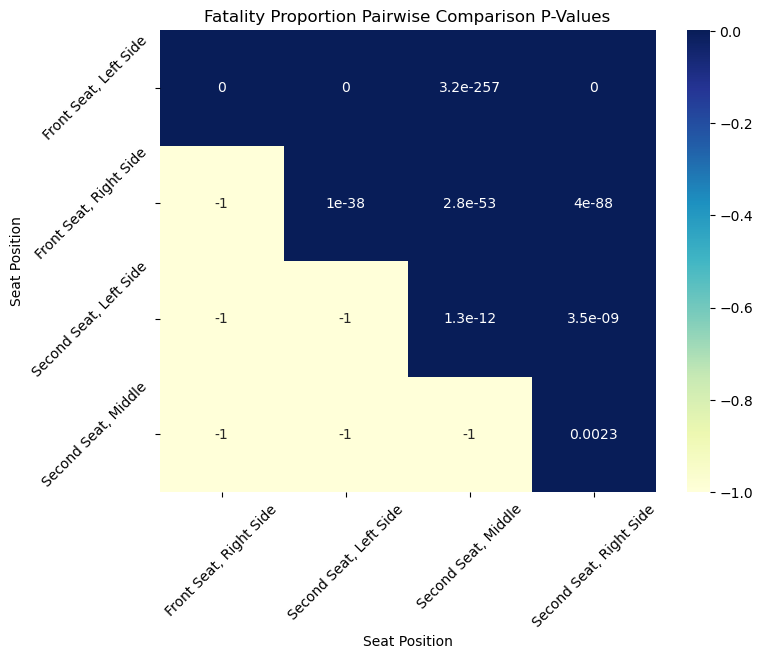

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
#seat_labels
seat_labels = df_seat_pos["Seat Pos"].unique()
seat_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in seat_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in seat_labels]
}

fatal_data = y_data["Fatal"]
non_fatal_data = y_data["Non-Fatal"]

row_comparisons = []
for i in range(len(fatal_data) - 1):
    comparisons = [-1 for i in range(len(fatal_data) - 1)]
    for j in range(i + 1, len(fatal_data)):

        # counts of 'success' for first seat position
        nob1 = fatal_data[i] + non_fatal_data[i]
        p1_counts = fatal_data[i]

        # counts of 'success' for second seat position
        nob2 = fatal_data[j] + non_fatal_data[j]
        p2_counts = fatal_data[j]

        # combined the successes in the seat positions
        nobs = np.asarray([nob1, nob2])
        counts = np.asarray([p1_counts, p2_counts])

        # perform 2 proportion z test
        stat, pval = proportions_ztest(counts, nobs)

        # store the pvalue in the array
        comparisons[j - 1] = pval
    
    row_comparisons.append(comparisons)

fig = plt.figure(figsize= (8, 6))

sns.heatmap(row_comparisons, annot = True, cmap="YlGnBu")
plt.title("Fatality Proportion Pairwise Comparison P-Values")
plt.xlabel("Seat Position")
plt.xticks([x+.5 for x in range(4)], seat_labels[1:], rotation = 45)
plt.ylabel("Seat Position")
plt.yticks([x + .5 for x in range(4)], seat_labels[:-1], rotation = 45)
plt.show()




<h1>3. General Fatality Trends</h1>

1a. Fatal cases over time.

In [ ]:
df_crash_list = pd.read_csv("../Resources/CrashList.csv")
df_crash_list.head()

,Unnamed: 0,CountyName,CrashDate,Fatals,Peds,Persons,St_Case,State,StateName,TotalVehicles
0,0,RIVERSIDE (65),2017-12-31 23:01:00,1,0,4,63463,6,California,2
1,1,LAKE (69),2017-12-31 23:15:00,1,0,1,120156,12,Florida,1
2,2,DOUGLAS (55),2017-12-31 23:20:00,1,0,2,310001,31,Nebraska,2
3,3,GREGG (183),2017-12-31 23:22:00,1,0,1,480010,48,Texas,1
4,4,DALLAS (113),2017-12-31 23:30:00,2,0,2,480006,48,Texas,2
